<a href="https://colab.research.google.com/github/sri-ram-swaminathan/Spaceship-Titanic-and-Decision-Trees/blob/main/Spaceship_Titanic_and_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project was a collaborative effort by
<br>
* Megha Hebbal : https://github.com/Megha-Hebbal
* Sriram : https://github.com/sri-ram-swaminathan

In [1]:
pip install opendatasets

In [2]:
# Importing the required libraries

import numpy as np
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Downloading the data

od.download("https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv")

Skipping, found downloaded files in "./spaceship-titanic" (use force=True to force download)


#**Part I : Exploratory Data Analysis**

### a) Data Cleaning

In [4]:
# Converting the csv training data into a pandas dataframe

train = pd.read_csv("/content/spaceship-titanic/train.csv")

# Finding the number of rows and columns

rows,cols = train.shape
print("Number of rows =",rows,"\nNumber of columns =",cols)

# Displaying the first five rows

train.head()

Number of rows = 8693 
Number of columns = 14


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Displaying the datatypes of the attributes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Attributes Explained**

1. `PassengerId (string)` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. `HomePlanet (string)` - The planet the passenger departed from, typically their planet of permanent residence.
3. `CryoSleep (boolean)` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. `Cabin (string)` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
5. `Age (float)` - The age of the passenger.
6. `VIP (boolean)` - Whether the passenger has paid for special VIP service during the voyage.
7. `RoomService(float)`, `FoodCourt(float)`, `ShoppingMall(float)`, `Spa(float)`, `VRDeck(float)` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
8. `Name (string)` - The first and last names of the passenger.
9. `Transported (boolean)` - Whether the passenger was transported to another dimension.

In [6]:
# Finding the statistical features of the numerical variables

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000




*   We can see that a lot of values are missing for each attribute.
*   The most used amenity is the FoodCourt and the least used is ShoppingMall.
*   Most of the amenities are used by very few people, which means that the mean is influenced by a few data points. This is reflected in the large standard deviations.



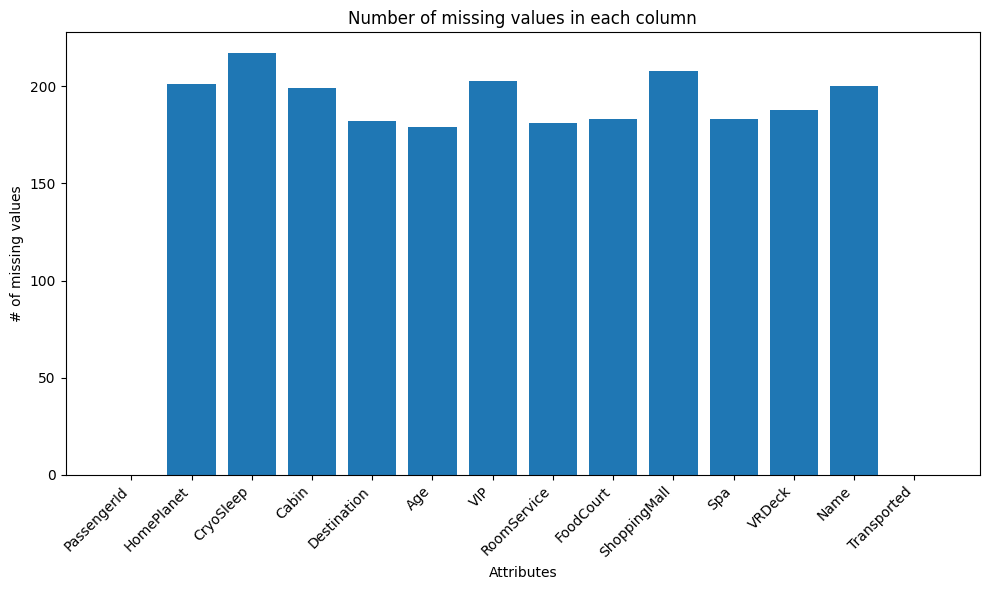

In [7]:
# Finding the missing values and plotting their frequency

x=list(train.columns)
y=list(train[i].isnull().sum() for i in list(train.columns))

# Creating the bar chart

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.xlabel('Attributes')
plt.ylabel('# of missing values')
plt.title("Number of missing values in each column")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

* `PassengerID` and `Transported`do not have any missing values since they are the target variables for this problem, and luckily remained intact.
* Dropping the missing values did not work since the missing values were disjoint, and ~ 2,000 values (25%) of the data was lost.
* Filling the missing values with mean / median values was not prefered because the non numeric values wouldn't be filled.
* Linear Interpolation is used since it works with non integer data types and is a mathematically proven method for predicting values within a given range.

In [8]:
# Filling the missing values (NaN) using linear interpolation

train.interpolate('linear', limit_direction='forward', inplace=True)

# Filling the missing values using backfill method (NaN is replaced with the preceding non-NaN entry in the same column)

train.fillna(method='bfill', inplace=True)

# Checking if all the missing values have been filled

print(train.isnull().sum())
train.describe()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.830726,225.138445,458.611872,172.246175,312.480674,303.895836
std,14.413834,662.541323,1602.468654,598.351120,1133.883247,1138.806652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,52.000000,83.000000,29.000000,63.000000,48.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The statistical features are changed very little if at all, after interpolation. Which indicates that the nature of the original data is preserved.

### b) Inferences

Text(0.5, 1.0, 'Correlation Matrix')

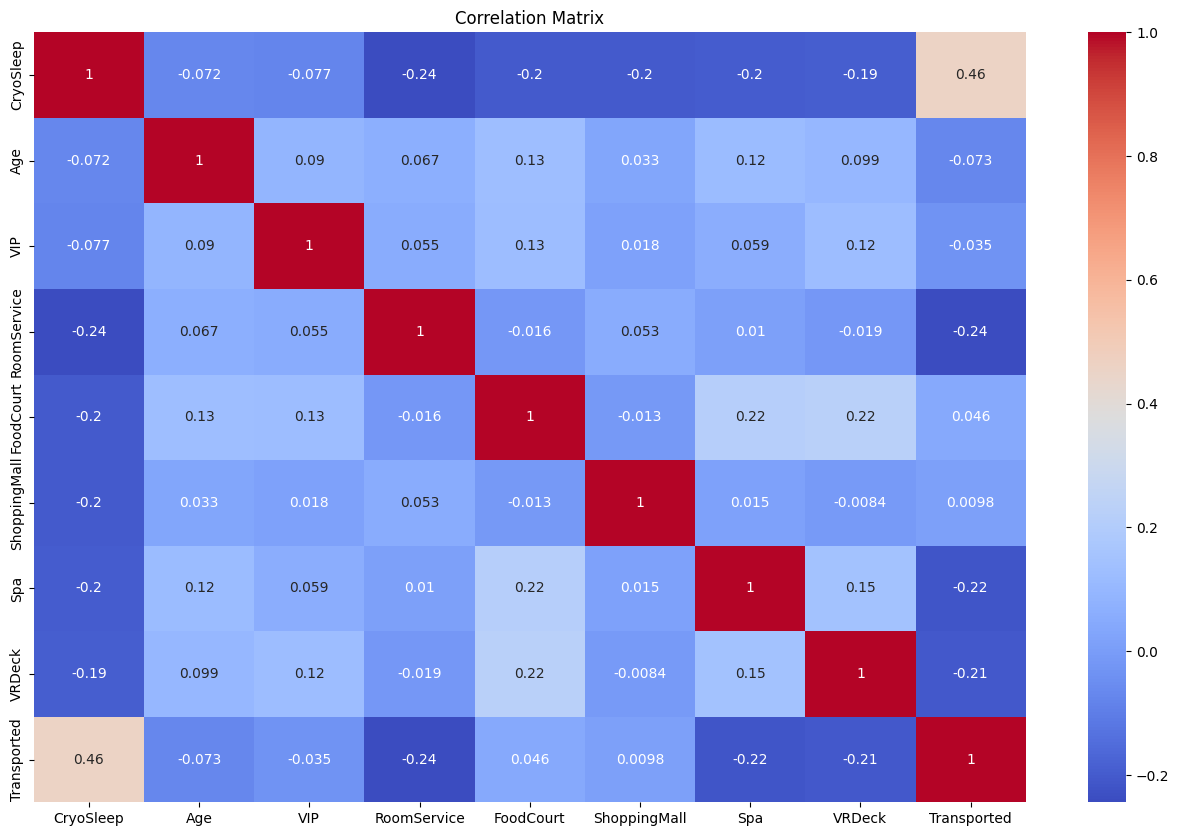

In [9]:
# Creating a heat map of the correlation matrix

subset_df=train[["CryoSleep","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]

corr_matrix = subset_df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')



*   Only numerical attirbutes and boolean values are considered.
*   The `Transported` feature (which indicates whether a passenger is transported or not) is positively, and highly correlated to cryosleep (r=+0.46). We know that people with `CryoSleep` values True were confined to their cabins. This means that people in their cabins have a high chance of being transported.
* `RoomService` (r=-0.24), `Spa` (r=-0.22) and `VRDeck` (r=-0.21) are negatively correlated with `Transported`. This means that if you have a low expenditure you have a high chance of being transported. This agrees with what we found before, as people who would have spent little on amentities would have either been in cryosleep/poor.



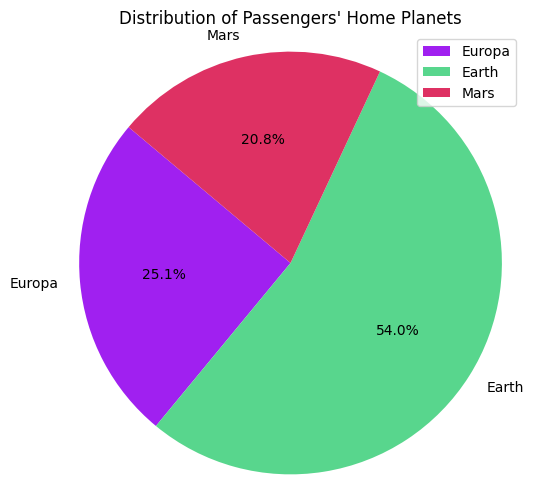

In [10]:
# Counting the unique values in the HomePlanet feature

labels = list(train['HomePlanet'].unique())
values=[]
for i in train['HomePlanet'].unique():
  values.append(list(train['HomePlanet']).count(i))

# Creating a pie chart of the Home Planets of passengers

colors = ['#A020F0', '#58D68D','#DE3163']
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.axis('equal')
plt.title("Distribution of Passengers' Home Planets")
plt.legend(labels, loc="best")

plt.show()

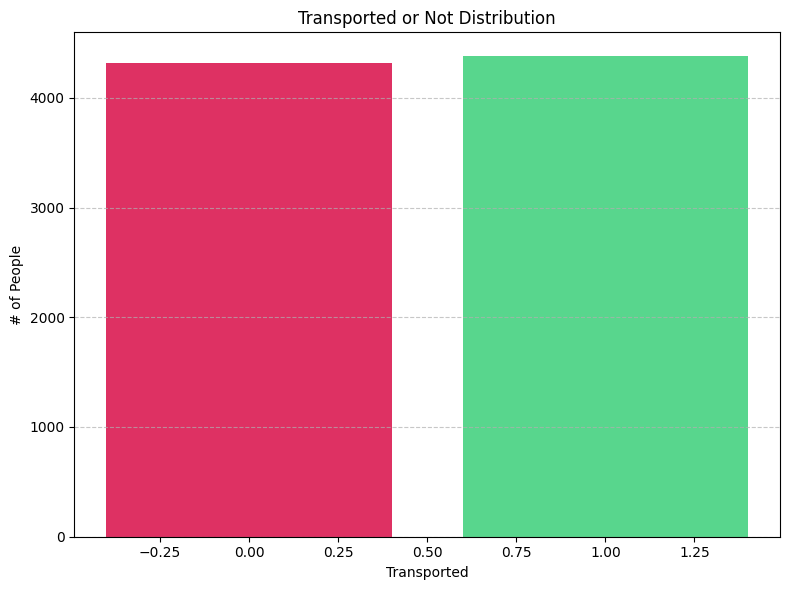

In [11]:
# Creating a bar chart of people transported or not

transported_df = train['Transported'].value_counts().reset_index()
transported_df.columns = ['Transported', 'count']

plt.figure(figsize=(8, 6))
plt.bar(transported_df['Transported'], transported_df['count'], color=['#58D68D', '#DE3163'])
plt.xlabel('Transported')
plt.ylabel('# of People')
plt.title("Transported or Not Distribution")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

There seems to be an number of passangers being transported. This may or may not indicate that the pattern is random.

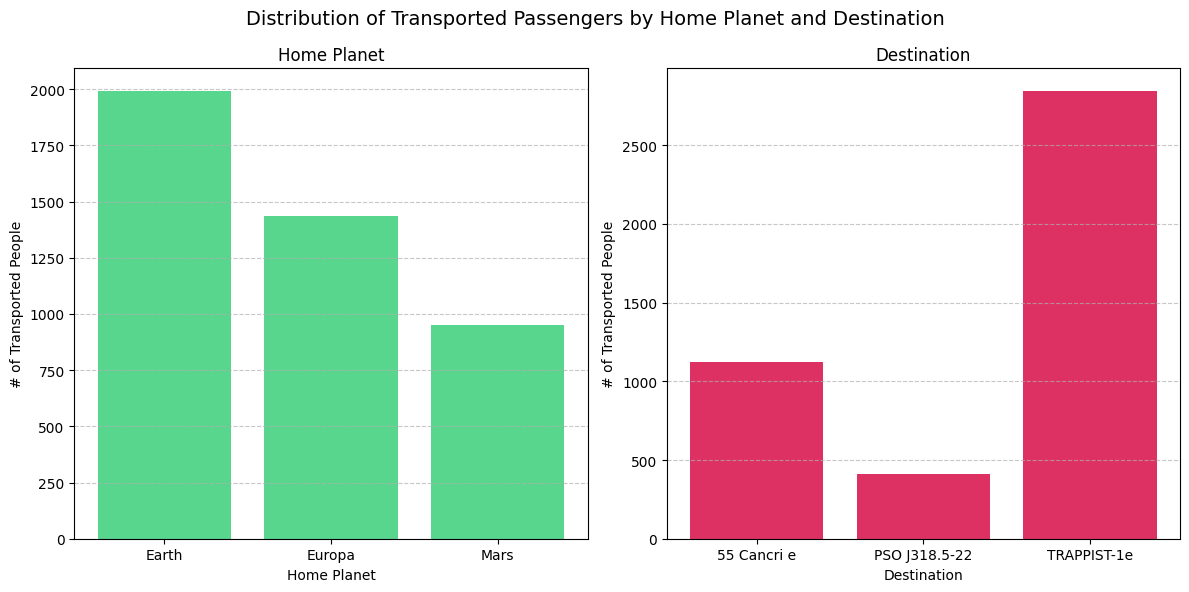

In [12]:
# Finding the Homeplanet of the passangers who have been transported along with their counts

HomePlanet=[]
Destination=[]
for index, row in train.iterrows():
  if row['Transported'] == True:
    HomePlanet.append(row['HomePlanet'])
    Destination.append(row['Destination'])

x1=list(np.unique(HomePlanet))
y1=[HomePlanet.count(i) for i in np.unique(HomePlanet)]


# Finding the Destination of the passangers who have been transported along with their counts

u=list(np.unique(Destination))
v=[Destination.count(i) for i in np.unique(Destination)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(x1, y1, color='#58D68D')
ax1.set_xlabel('Home Planet')
ax1.set_ylabel('# of Transported People')
ax1.set_title('Home Planet')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(u, v, color='#DE3163')
ax2.set_xlabel('Destination')
ax2.set_ylabel('# of Transported People')
ax2.set_title('Destination')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Distribution of Transported Passengers by Home Planet and Destination', fontsize=14)
plt.tight_layout()

plt.show()



*   Most of the people transported are coming from Earth.
*   Most people transported were going to Trappist-1e (may or may not be from Earth).


# **Part II : Decision Trees using numpy**

##(a) Explanation

###**Decision trees**:
 Fundamental supervised machine learning algorithm used for classification tasks. They work by building a tree-like structure that predicts a target variable based on a series of features (independent variables) in the data. The tree is constructed by recursively splitting the data based on the most informative feature at each step.
<br>
<br>

---
<br>

####**Building the tree**:
* The algorithm starts with the entire dataset at the root node.
* It then searches for the best feature to split the data into two child nodes. The "best feature" is the one that best separates the data points based on the target variable.
* This process of splitting is repeated on each child node, using a (different) feature at each step, until a stopping criterion is met. The stopping criteria include:
1. Reaching a maximum depth for the tree.
2. Having a minimum number of samples at a node (to avoid overfitting).
<br>
<br>
---
<br>

####**Splitting Criteria**:
* The "best feature" selection for splitting is typically determined using a measure like Information Gain or Gini impurity. For our purposes, we have used Information Gain
* **Entropy**: Measure of non-homogeneity/non-uniformity of the data in a node. Lower value indicates higher uniformity. Need to minimise this value. <br>
Formula: $- ∑_{i}p_{i}log(p_{i})$ where $p_{i}$ is the probability of target value i
* **Information gain**: Measures the decrease in entropy (uncertainty) between parent and child nodes after a split. Higher information gain indicates a more informative split. <br>
Formula: $Entropy(Parent)-∑(w_{i}Entropy(Child_{i}))$ where $w_{i}$ is the weight of each child node.
<br>
<br>
---
<br>

####**Making Predictions**:
* Once the tree is built, a new data point can be classified by traversing the tree from the root node down.
* At each node, the value of the corresponding feature in the data point is compared to the threshold value used for splitting.
* The data point is directed to the left or right child node based on the comparison.
* This process continues until a leaf node (terminal node) is reached. The class label associated with the leaf node becomes the predicted target value for the new data point.
<br>
<br>
---
<br>

####**Node**:
This class represents a single node within the decision tree structure. Each node holds information about itself and its connections to other nodes. There are 3 kinds of nodes: Root, Decision and Leaf node. Here's a breakdown of the attributes:

* `feature_index`: This attribute stores the index of the feature used to split the data at this node. It's None for leaf nodes (where no further splitting occurs).
* `threshold_value`: This attribute stores the specific value of the feature used for splitting at this node. It's None for leaf nodes.
* `left`: This attribute is the left child node of the current node. It's None if the current node is a leaf node.
* `right`: This attribute is the right child node of the current node. It's None if the current node is a leaf node.
* `leaf_value`: This attribute stores the majority class label of the data contained in this leaf node. It's None for non-leaf nodes.
* `data`: This attribute can store the actual data points (rows) that belong to this node during the tree building process.
<br>
<br>
---
<br>

####**DecisionTreeClassifier**:
Built using only Numpy arrays, this class implements the core functionality for building and using a decision tree classifier for classification tasks.
* `split` - Takes a dataset, feature index, and threshold value, and splits the data into left and right child datasets based on the threshold value.
* `best_split` - Iterates through all features and their possible values, finding the split that results in the maximum information gain.
* `calculate_leaf_value` - Calculates the majority class (most frequent target value) within a dataset, used for assigning a class label to leaf nodes.
* `build_tree` - Recursively builds the decision tree. It checks if the stopping criteria (depth or minimum samples) are met. If not, it finds the best split, creates a node with that information, splits the data, and recursively builds the left and right subtrees. Otherwise, it creates a leaf node with the majority class.
* `fit` - Takes the training data (X) and calls the build_tree function to construct the decision tree based on that data.
* `predict_single` - Takes a single data row and the current tree node. It recursively traverses the tree based on the feature values in the row until a leaf node is reached. The leaf node's value (predicted class label) is returned.
* `predict` - Takes the entire testing data (Y) and calls predict_single for each row, building a list of predicted target values for all data points. This is the output that's returned.







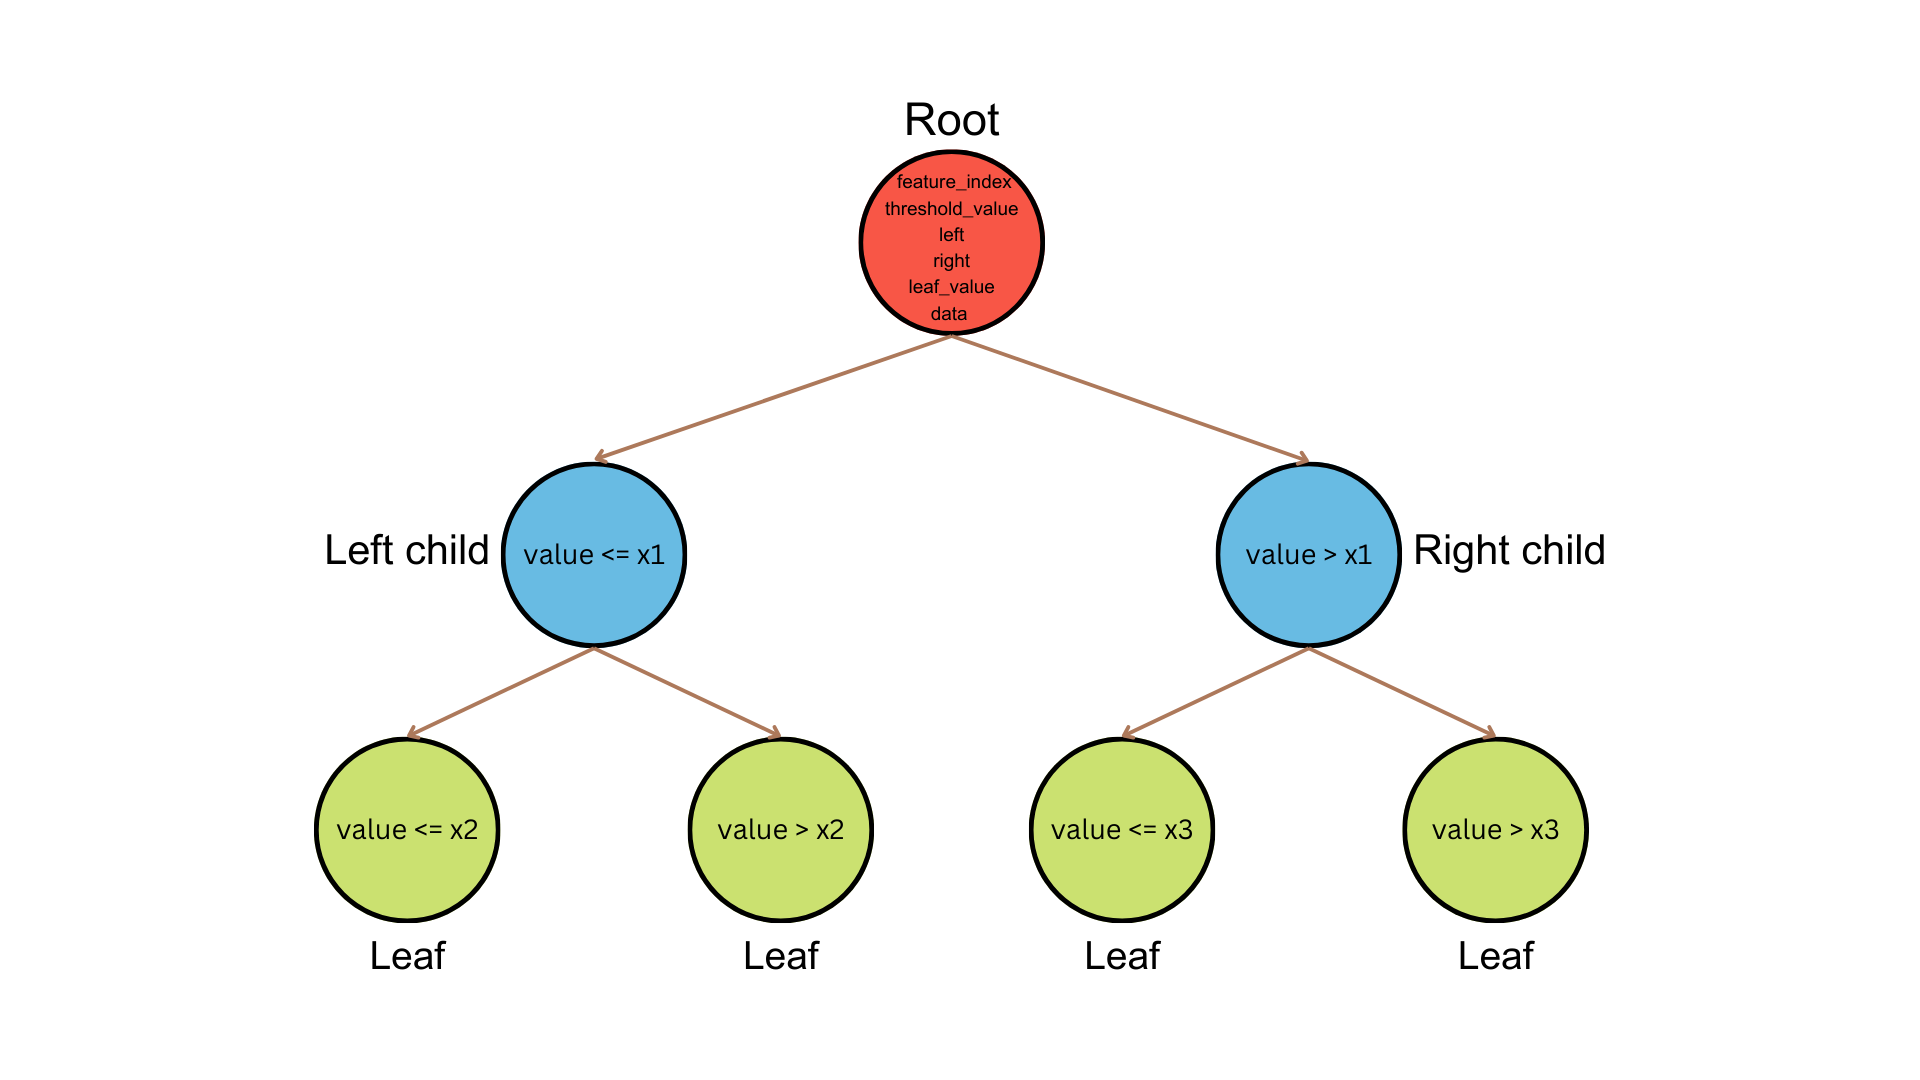

##(b) Code Implementation

In [13]:
# Class for each node in the Decision Tree

class Node:

  # Initialising the values for each node
  def __init__(self, feature_index=None, threshold_value=None, left=None, right=None, leaf_value=None, data=None):
    self.feature_index= feature_index           # The index of the feature used to split
    self.threshold_value = threshold_value      # The value for the corresponding feature, at which splitting occurs
    self.left = left                            # The left child node of the current node (set to None if it is a leaf node)
    self.right = right                          # The right child node of the current node (set to None if it is a leaf node)
    self.leaf_value = leaf_value                # The majority class when it is a leaf node (set to None if it is not a leaf node)
    self.data = data                            # The rows stored in that node

In [14]:
# Class for the Decision Tree

class DecisionTreeClassifier:
    def __init__(self, min_data=1, max_depth=2):
        self.min_data = min_data    # Setting the minimum number of data points per row
        self.max_depth = max_depth  # Setting the maximum depth of the tree
        self.root = None


    def entropy(self, data):
        # Entropy = -sum(p_i * log(p_i))
        rows, columns = np.shape(data)
        target = list(data[i][-1] for i in range(rows))

        if target.count(True) == 0 or target.count(False) == 0:
            entropy = float(0.0)
        else:
            p_true = target.count(True) / len(target)
            p_false = target.count(False) / len(target)

            entropy = -(p_true * np.log2(p_true) + p_false * np.log2(p_false))

        return entropy


    def IG(self, parent_data, left_child_data, right_child_data):
        # Information gain = entropy(parent) - sum(weight*entropy(child))
        rows, columns = np.shape(parent_data)
        parent_target = list(parent_data[i][-1] for i in range(rows))

        rows, columns = np.shape(left_child_data)
        left_child_target = list(left_child_data[i][-1] for i in range(rows))
        rows, columns = np.shape(right_child_data)
        right_child_target = list(right_child_data[i][-1] for i in range(rows))

        IG = self.entropy(parent_data) - (
                (len(right_child_target) / len(parent_target)) * self.entropy(right_child_data) +
                (len(left_child_target) / len(parent_target)) * self.entropy(left_child_data))
        return IG


    def split(self, parent_data, feature_index, threshold_value):
        # Splitting the data of a node given the feature index and threshold value
        right = []
        left = []
        for row in parent_data:
            if int(row[feature_index]) <= threshold_value:
                left.append(row)
            else:
                right.append(row)

        right_child_data = np.array(right)
        left_child_data = np.array(left)

        return left_child_data, right_child_data


    def best_split(self, parent_data):
        # Finding the best feature and threshold value to split the node
        max_ig = -float("inf")
        best_feature = None
        threshold_value = None
        rows, columns = np.shape(parent_data)

        # Traversing through every feature
        for feature_index in range(columns - 1):
            # Traversing through every value of the current feature
            s = set(parent_data[i][feature_index] for i in range(rows))
            for value in s:
                # Splitting the parent node at the current feature and value
                left_child_data, right_child_data = self.split(parent_data=parent_data, feature_index=feature_index,
                                                               threshold_value=value)
                # Ensuring the children nodes aren't empty
                if len(left_child_data) > 0 and len(right_child_data) > 0:
                    # Calulating the resulting information gain and finding the maximum information gain
                    ig = self.IG(parent_data=parent_data, left_child_data=left_child_data,
                                 right_child_data=right_child_data)
                    if max_ig < ig:
                        max_ig = ig
                        best_feature = feature_index
                        threshold_value = value

        return best_feature, threshold_value


    def calculate_leaf_value(self, target_data):
        # Returning the majority class of the data in the leaf node
        rows, columns = target_data.shape
        true_count = [target_data[i][-1] for i in range(rows)].count(True)
        false_count = [target_data[i][-1] for i in range(rows)].count(False)
        leaf_value = True if true_count >= false_count else False
        return leaf_value


    def build_tree(self, X, curr_depth=0):
        # Finding the number of samples and number of features in the entire dataset
        num_samples, num_features = np.shape(X)

        # Checking if the limits have been reached
        if curr_depth <= self.max_depth and num_samples > self.min_data:
            # Finding the best split
            best_feature, threshold_value = self.best_split(parent_data=X)

            # Creating the node
            node = Node(feature_index=best_feature, threshold_value=threshold_value, data=X)

            # Splitting the data
            left_child_data, right_child_data = self.split(parent_data=X, feature_index=best_feature,
                                                           threshold_value=threshold_value)

            # Ensuring the children nodes aren't empty
            if len(left_child_data) > 0 and len(right_child_data) > 0:
                # Recursivrly building the left subtree
                node.left = self.build_tree(X=left_child_data, curr_depth=curr_depth + 1)
                # Recursively building the right subtree
                node.right = self.build_tree(X=right_child_data, curr_depth=curr_depth + 1)

            return node

        else:
            # Computing the leaf value at the base case
            leaf_value = self.calculate_leaf_value(target_data=X)
            return Node(leaf_value=leaf_value, data=X)


    def fit(self, X):
        # Bulding the tree on a particular dataset
        self.root = self.build_tree(X=X)


    def predict_single(self, row, node):
        # Predicting the target value of a single row by recursively going down the tree
        # Finding out if the node is a leaf node or not
        if node.leaf_value is not None:
            return node.leaf_value
        if row[node.feature_index] <= node.threshold_value:
            # Going down the left subtree
            return self.predict_single(row, node=node.left)
        else:
            # Going down the right subtree
            return self.predict_single(row, node=node.right)


    def predict(self, Y):
        # Predicting the output for all the rows
        predicted_targets = [self.predict_single(row=row, node=self.root) for row in Y]
        return predicted_targets

### (b) Evaluation and Comparison

There are two ways to evaluate the performance of our Decision Tree.

One way is to make a kaggle submission, predicting on test data. It cannot be replicated here since the real test values are not made public.

Another way is to split the available data into traning and testing data. We train our model on the traning data and use the `accuracy_score` method from `sklearn` to evaluate it's performance on the testing data.

Furthermore, we train the `DecesionTreeRegressor` from `sklearn` on the same data and compare the results.  

In [15]:
# Initialising the Decision Tree

mytree=DecisionTreeClassifier(max_depth=5)

# Converting the csv data csv into a pandas dataframe

df_train = pd.read_csv("/content/spaceship-titanic/train.csv")
df_test = pd.read_csv("/content/spaceship-titanic/test.csv")

# Filling the missing values (NaN) using linear interpolation.

df_train.interpolate('linear', limit_direction='forward', inplace=True)

# Filling the missing values using backfill method (NaN is replaced with the value found in the immediately preceding non-NaN entry in the same column)

df_train.fillna(method='bfill', inplace=True)

# Preparing the data for building the tree

train = df_train[["CryoSleep","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
train=train.to_numpy()
test = df_test[["CryoSleep","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
test=test.to_numpy()

# Training our Decision Tree on the tranining data

mytree.fit(train)

# Predicting the test values using the training data as input

output=mytree.predict(test)

# Returning the output as a csv for the kaggle subission

column1=df_test["PassengerId"]
column2=pd.Series(output)
d={'PassengerId':column1,'Transported':column2}
final=pd.DataFrame(data=d)
submission=final.to_csv('submission.csv',index=False)

This file upon submission to the Kaggle competition yields a score of 0.75239


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# Preparing the data for building the tree

X = df_train[["CryoSleep","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
y = df_train["Transported"]

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Converting the dataframes into numpy arrays to use in our Decesion Tree

train = pd.concat([X_train, y_train],axis = 1)
train = train.to_numpy()
test = X_test.to_numpy()

# Training our Decision Tree on the tranining data

mytree.fit(train)

# Predicting the result on the testing data

myresults = mytree.predict(test)
myresults = np.array(myresults)

# Findiing out our Decision Tree's accuracy

accuracy=accuracy_score(myresults,y_test)
print("The acuracy of our Decision Tree is",accuracy)

The acuracy of our Decision Tree is 0.7901092581943646


In [17]:
from sklearn.tree import DecisionTreeRegressor

# Training the model on the training data

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predicting the results on the testing data

predicted = model.predict(X_test)
predicted = np.around(predicted)

# Finding out sklearn's accuracy

accuracy1=accuracy_score(y_test, predicted)
print("Accuracy of sklearn's Decision Tree is", accuracy1)

Accuracy of sklearn's Decision Tree is 0.7452558941920644


Our model outperforms the `DecisionTreeRegressor` from `sklearn` by 0.05 accuracy points.

### Future Improvements:

* The `max_depth` can be changed to maximise accuracy.
* It took about 6 minutes to fit the data to our model. Code can be optimised to reduce runtime.
* The `DecisionTreeClassifier` class can be leveraged to build the Random Forest algorithm.
* Our model works only when the target variable contains Boolean values. It can be generalised to account for other datatypes.


